# scPipe-Multimodal Seurat

In [ ]:
# if (!requireNamespace("BiocManager", quietly = TRUE)) install.packages("BiocManager")
# BiocManager::install(c("harmony"))
# BiocManager::install(c("glmGamPoi"))
# BiocManager::install('limma')

# install.packages("Seurat")
# install.packages("sctransform")

# install.packages('devtools')
# devtools::install_github('immunogenomics/presto')

In [1]:
# Library import

library(Seurat)
library(ggplot2)
library(sctransform)
library(harmony)
library(patchwork)
library(dplyr)
library(magrittr)

set.seed(1)

# Multicore CPU usage activation - Future

library(future)

# plan("multicore", workers = 24) # Mac Pro 6.1
# plan(workers = 36) # iMac Pro 1.1
# plan("multicore", workers = 8) # 4 core Intel CPU and M1 have 8 threads
# plan("multicore", workers = 12) # 6 core Intel CPU has 12 threads
plan("multicore", workers = 10) # 10 core M1 Pro CPU has 10 threads

# Set RAM Size to 3/4 of total RAM

# options(future.globals.maxSize = 48000 * 1024^2) # Mac Pros have 64 Gb
options(future.globals.maxSize = 16000 * 1024^2) # iMacs and MacBook Pros have 16 Gb

future.seed=TRUE # Removes future-generated statistical errors

Warning message:
“пакет ‘Seurat’ был собран под R версии 4.3.3”
Загрузка требуемого пакета: SeuratObject

Warning message:
“пакет ‘SeuratObject’ был собран под R версии 4.3.3”
Загрузка требуемого пакета: sp


Присоединяю пакет: ‘SeuratObject’


Следующие объекты скрыты от ‘package:base’:

    intersect, t


Загрузка требуемого пакета: Rcpp

Warning message:
“пакет ‘Rcpp’ был собран под R версии 4.3.3”
Warning message:
“пакет ‘patchwork’ был собран под R версии 4.3.3”

Присоединяю пакет: ‘dplyr’


Следующие объекты скрыты от ‘package:stats’:

    filter, lag


Следующие объекты скрыты от ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“пакет ‘future’ был собран под R версии 4.3.3”


In [85]:
data_dir <- './TNF-Norm_1/TNF-Norm_SampleTag01_hs_RSEC_MolsPerCell_MEX'
counts <- Read10X(data.dir = data_dir)
Norm_1 = CreateSeuratObject(counts = counts$`Gene Expression`)
Norm_1[['ADT']] = CreateAssayObject(counts = counts$`Antibody Capture`)
Norm_1[["percent.mt"]] <- PercentageFeatureSet(Norm_1, pattern = "^MT-")

data_dir <- './TNF-Norm_2/TNF-Norm_SampleTag02_hs_RSEC_MolsPerCell_MEX'
counts <- Read10X(data.dir = data_dir)
Norm_2 = CreateSeuratObject(counts = counts$`Gene Expression`)
Norm_2[['ADT']] = CreateAssayObject(counts = counts$`Antibody Capture`)
Norm_2[["percent.mt"]] <- PercentageFeatureSet(Norm_2, pattern = "^MT-")

data_dir <- './TNF-Norm_3/TNF-Norm_SampleTag03_hs_RSEC_MolsPerCell_MEX'
counts <- Read10X(data.dir = data_dir)
Norm_3 = CreateSeuratObject(counts = counts$`Gene Expression`)
Norm_3[['ADT']] = CreateAssayObject(counts = counts$`Antibody Capture`)
Norm_3[["percent.mt"]] <- PercentageFeatureSet(Norm_3, pattern = "^MT-")

data_dir <- './TNF-Norm_TNF_1/TNF-Norm_SampleTag04_hs_RSEC_MolsPerCell_MEX'
counts <- Read10X(data.dir = data_dir)
Norm_TNF_1 = CreateSeuratObject(counts = counts$`Gene Expression`)
Norm_TNF_1[['ADT']] = CreateAssayObject(counts = counts$`Antibody Capture`)
Norm_TNF_1[["percent.mt"]] <- PercentageFeatureSet(Norm_TNF_1, pattern = "^MT-")

data_dir <- './TNF-Norm_TNF_2/TNF-Norm_SampleTag05_hs_RSEC_MolsPerCell_MEX'
counts <- Read10X(data.dir = data_dir)
Norm_TNF_2 = CreateSeuratObject(counts = counts$`Gene Expression`)
Norm_TNF_2[['ADT']] = CreateAssayObject(counts = counts$`Antibody Capture`)
Norm_TNF_2[["percent.mt"]] <- PercentageFeatureSet(Norm_TNF_2, pattern = "^MT-")

data_dir <- './TNF-Norm_TNF_3/TNF-Norm_SampleTag06_hs_RSEC_MolsPerCell_MEX'
counts <- Read10X(data.dir = data_dir)
Norm_TNF_3 = CreateSeuratObject(counts = counts$`Gene Expression`)
Norm_TNF_3[['ADT']] = CreateAssayObject(counts = counts$`Antibody Capture`)
Norm_TNF_3[["percent.mt"]] <- PercentageFeatureSet(Norm_TNF_3, pattern = "^MT-")

data_dir <- './TNF-Rheu_1/TNF-Rheu_SampleTag01_hs_RSEC_MolsPerCell_MEX'
counts <- Read10X(data.dir = data_dir)
Rheu_1 = CreateSeuratObject(counts = counts$`Gene Expression`)
Rheu_1[['ADT']] = CreateAssayObject(counts = counts$`Antibody Capture`)
Rheu_1[["percent.mt"]] <- PercentageFeatureSet(Rheu_1, pattern = "^MT-")

data_dir <- './TNF-Rheu_2/TNF-Rheu_SampleTag02_hs_RSEC_MolsPerCell_MEX'
counts <- Read10X(data.dir = data_dir)
Rheu_2 = CreateSeuratObject(counts = counts$`Gene Expression`)
Rheu_2[['ADT']] = CreateAssayObject(counts = counts$`Antibody Capture`)
Rheu_2[["percent.mt"]] <- PercentageFeatureSet(Rheu_2, pattern = "^MT-")

data_dir <- './TNF-Rheu_3/TNF-Rheu_SampleTag03_hs_RSEC_MolsPerCell_MEX'
counts <- Read10X(data.dir = data_dir)
Rheu_3 = CreateSeuratObject(counts = counts$`Gene Expression`)
Rheu_3[['ADT']] = CreateAssayObject(counts = counts$`Antibody Capture`)
Rheu_3[["percent.mt"]] <- PercentageFeatureSet(Rheu_3, pattern = "^MT-")

data_dir <- './TNF-Rheu_TNF_1/TNF-Rheu_SampleTag04_hs_RSEC_MolsPerCell_MEX'
counts <- Read10X(data.dir = data_dir)
Rheu_TNF_1 = CreateSeuratObject(counts = counts$`Gene Expression`)
Rheu_TNF_1[['ADT']] = CreateAssayObject(counts = counts$`Antibody Capture`)
Rheu_TNF_1[["percent.mt"]] <- PercentageFeatureSet(Rheu_TNF_1, pattern = "^MT-")

data_dir <- './TNF-Rheu_TNF_2/TNF-Rheu_SampleTag05_hs_RSEC_MolsPerCell_MEX'
counts <- Read10X(data.dir = data_dir)
Rheu_TNF_2 = CreateSeuratObject(counts = counts$`Gene Expression`)
Rheu_TNF_2[['ADT']] = CreateAssayObject(counts = counts$`Antibody Capture`)
Rheu_TNF_2[["percent.mt"]] <- PercentageFeatureSet(Rheu_TNF_2, pattern = "^MT-")

data_dir <- './TNF-Rheu_TNF_3/TNF-Rheu_SampleTag06_hs_RSEC_MolsPerCell_MEX'
counts <- Read10X(data.dir = data_dir)
Rheu_TNF_3 = CreateSeuratObject(counts = counts$`Gene Expression`)
Rheu_TNF_3[['ADT']] = CreateAssayObject(counts = counts$`Antibody Capture`)
Rheu_TNF_3[["percent.mt"]] <- PercentageFeatureSet(Rheu_TNF_3, pattern = "^MT-")

10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have pipe characters ('|'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have pipe characters ('|'), replacing with dashes ('-')”
10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have pipe characters ('|'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have pipe characters ('|'), replacing with dashes ('-')”
10X data contains more than one type and

In [86]:
# Merge Norm
merged_seurat_norm <- merge(Norm_1, y = c(Norm_2, Norm_3), 
                       add.cell.ids = c("Sample_PBMCs 1","Sample_PBMCs 2", "Sample_PBMCs 3"))
# Split by sample
merged_seurat_norm[['Sample']] = as.character(sapply(
    rownames(merged_seurat_norm@meta.data), function(x) {strsplit(x,"_")[[1]][[2]]}))

# Merge Norm + TNF
merged_seurat_norm_tnf <- merge(Norm_TNF_1, y = c(Norm_TNF_2, Norm_TNF_3), 
                       add.cell.ids = c("Sample_PBMCs + TNFa 1","Sample_PBMCs + TNFa 2", "Sample_PBMCs + TNFa 3"))
# Split by sample
merged_seurat_norm_tnf[['Sample']] = as.character(sapply(
    rownames(merged_seurat_norm_tnf@meta.data), function(x) {strsplit(x,"_")[[1]][[2]]}))

# Merge Rheu
merged_seurat_rheu <- merge(Rheu_1, y = c(Rheu_2, Rheu_3), 
                       add.cell.ids = c("Sample_PBMCs RA 1","Sample_PBMCs RA 2","Sample_PBMCs RA 3"))
# Split by sample
merged_seurat_rheu[['Sample']] = as.character(sapply(
    rownames(merged_seurat_rheu@meta.data), function(x) {strsplit(x,"_")[[1]][[2]]}))

# Merge Rheu + TNF
merged_seurat_rheu_tnf <- merge(Rheu_TNF_1, y = c(Rheu_TNF_2, Rheu_TNF_3), 
                       add.cell.ids = c("Sample_PBMCs RA + TNFa 1","Sample_PBMCs RA + TNFa 2", "Sample_PBMCs RA + TNFa 3"))
# Split by sample
merged_seurat_rheu_tnf[['Sample']] = as.character(sapply(
    rownames(merged_seurat_rheu_tnf@meta.data), function(x) {strsplit(x,"_")[[1]][[2]]}))

merged_seurat <- merge(merged_seurat_norm, y = c(merged_seurat_norm_tnf,merged_seurat_rheu,merged_seurat_rheu_tnf), 
                       add.cell.ids = c("Group_PBMCs", "Group_PBMCs + TNFa", "Group_PBMCs RA", "Group_PBMCs RA + TNFa"
                                        ), project = "TNF-seq")
# Split by condition
merged_seurat[['Group']] = as.character(sapply(
    rownames(merged_seurat@meta.data), function(x) {strsplit(x,"_")[[1]][[2]]}))
head(merged_seurat@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,percent.mt,Sample,Group
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>
Group_PBMCs_Sample_PBMCs 1_3794,SeuratProject,7528,2730,2481,9,17.747078,PBMCs 1,PBMCs
Group_PBMCs_Sample_PBMCs 1_54922,SeuratProject,16229,4227,3939,10,9.951322,PBMCs 1,PBMCs
Group_PBMCs_Sample_PBMCs 1_68296,SeuratProject,6681,2578,1075,9,19.353390,PBMCs 1,PBMCs
Group_PBMCs_Sample_PBMCs 1_97680,SeuratProject,7054,2780,908,10,13.935356,PBMCs 1,PBMCs
Group_PBMCs_Sample_PBMCs 1_121103,SeuratProject,7480,2813,863,10,14.879679,PBMCs 1,PBMCs
Group_PBMCs_Sample_PBMCs 1_127633,SeuratProject,6461,2554,1002,9,14.099985,PBMCs 1,PBMCs


In [87]:
tail(merged_seurat@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,percent.mt,Sample,Group
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56393507,SeuratProject,6877,2821,1721,10,10.178857,PBMCs RA + TNFa 3,PBMCs RA + TNFa
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56454804,SeuratProject,5574,2424,1584,10,9.921062,PBMCs RA + TNFa 3,PBMCs RA + TNFa
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56468994,SeuratProject,4374,2013,1331,10,17.604024,PBMCs RA + TNFa 3,PBMCs RA + TNFa
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56521104,SeuratProject,6573,2870,453,9,10.680055,PBMCs RA + TNFa 3,PBMCs RA + TNFa
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56530152,SeuratProject,8274,3439,1239,9,11.808073,PBMCs RA + TNFa 3,PBMCs RA + TNFa
Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56604930,SeuratProject,5345,2386,799,10,10.364827,PBMCs RA + TNFa 3,PBMCs RA + TNFa


In [88]:
merged_seurat

An object of class Seurat 
37097 features across 31268 samples within 2 assays 
Active assay: RNA (37087 features, 0 variable features)
 12 layers present: counts.1.1, counts.1.2, counts.1.3, counts.1.4, counts.2.1, counts.2.2, counts.2.3, counts.2.4, counts.3.1, counts.3.2, counts.3.3, counts.3.4
 1 other assay present: ADT

In [ ]:
# FeatureScatter Plot QC

plot_QC_1 <- FeatureScatter(merged_seurat, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot_QC_2 <- FeatureScatter(merged_seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot_QC_1
plot_QC_2

In [ ]:
merged_seurat_QC <- subset(merged_seurat, subset = 
                           nFeature_RNA > 0 
                           & nFeature_RNA < 7500
                           & percent.mt < 23.5
                          )
plot_QC_1 <- FeatureScatter(merged_seurat_QC, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot_QC_2 <- FeatureScatter(merged_seurat_QC, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot_QC_1
plot_QC_2
merged_seurat_QC

In [ ]:
# Контроль качества при помощи FeatureScatter Plot

p1 <- FeatureScatter(merged_seurat_QC, feature2 = "nCount_ADT", feature1 = "nFeature_ADT")
p1

In [ ]:
merged_seurat_QC_ADT <- subset(merged_seurat_QC,  nCount_ADT < 7500 & nFeature_ADT > 4)

p2 <- FeatureScatter(merged_seurat_QC_ADT, feature2 = "nCount_ADT", feature1 = "nFeature_ADT")
p2
merged_seurat_QC_ADT

In [ ]:
merged_seurat <- merged_seurat_QC_ADT

In [ ]:
SCT_merged_seurat <- SCTransform(merged_seurat, method = "glmGamPoi", verbose = TRUE)

In [ ]:
# AbSeq Norm
DefaultAssay(SCT_merged_seurat) <- 'ADT'

VariableFeatures(SCT_merged_seurat) <- rownames(SCT_merged_seurat[["ADT"]])
SCT_merged_seurat <- NormalizeData(SCT_merged_seurat, normalization.method = 'CLR', margin = 2) %>% 
  ScaleData() %>% RunPCA(reduction.name = 'apca')

In [ ]:
# Calculate PCs using variable features determined by SCTransform
SCT_merged_seurat <- RunPCA(SCT_merged_seurat, assay = "SCT", npcs = 40)

In [ ]:
harmonized_seurat <- RunHarmony(SCT_merged_seurat, 
#                                 group.by.vars = c("Sample"),
                                group.by.vars = c("Group"),
                                reduction = "pca", assay.use = "SCT", plot_convergence = FALSE, 
                                project.dim = F, reduction.save = "mRNA_harmony")

In [ ]:
harmonized_seurat <- RunHarmony(harmonized_seurat, 
                                group.by.vars = c("Group"), 
#                                 group.by.vars = c("Sample"),
                                reduction = "apca", assay.use = "ADT", plot_convergence = FALSE, 
                                project.dim = F, reduction.save = "abseq_harmony")

In [ ]:
ElbowPlot(harmonized_seurat, ndims = 40, reduction = "mRNA_harmony")

In [ ]:
ElbowPlot(harmonized_seurat, ndims = 30, reduction = "abseq_harmony")

In [ ]:
# WNN multimodal integration
harmonized_seurat <- FindMultiModalNeighbors(
  harmonized_seurat, reduction.list = list("mRNA_harmony", "abseq_harmony"), 
  dims.list = list(1:30, 1:9), modality.weight.name = "RNA.weight"
)
harmonized_seurat <- RunUMAP(harmonized_seurat, nn.name = "weighted.nn", 
                             reduction.name = "wnn.umap", reduction.key = "wnnUMAP_")

In [ ]:
# Sample integration QC
DimPlot(harmonized_seurat, 
              reduction = "wnn.umap",
              group.by = "Sample",
              label=FALSE,
              pt.size = 0.5,
              label.size = 10)
# Save the last plot as a pdf

ggsave(
  "Harmony.pdf",
  plot = last_plot(),
  device = "pdf",
#   path = NULL,
#   scale = 1,
#   1 plot == 10 cm in each dimention
  width = 19.5,
  height = 15,
  units = "cm",
  dpi = 10000,
  limitsize = TRUE,
#   bg = NULL,
)

In [ ]:
DefaultAssay(harmonized_seurat) <- 'ADT'
features_Ab = c('CD45RA:HI100-PTPRC-AHS0009-pAbO','CD45RO-PTPRC-AHS0036-pAbO',
                'CD4:SK3-CD4-AHS0032-pAbO','CD8:SK1-CD8A-AHS0228-pAbO','CD56:NCAM16.2-NCAM1-AHS0019-pAbO',
                'CD16:B73.1-FCGR3A-FCGR3B-AHS0242-pAbO','CD14:MPHIP9-CD14-AHS0037-pAbO',
                'CD19:HIB19-CD19-AHS0161-pAbO'
                # ,
                # 'CD120A-TNFRSF1A-AHS0439-pAbO','CD120b-TNFRSF1B-AHS0421-pAbO'
                )

FeaturePlot(harmonized_seurat, features = features_Ab, 
                  reduction = 'wnn.umap', ncol = 4)

# Save the last plot as a pdf

ggsave(
  "AB-markers.pdf",
  plot = last_plot(),
  device = "pdf",
#   path = NULL,
#   scale = 1,
#   1 plot == 10 cm in each dimention
  width = 52,
  height = 25,
  units = "cm",
  dpi = 10000,
  limitsize = TRUE,
#   bg = NULL,
)

In [ ]:
harmonized_seurat <- readRDS("Seurat_Clusters.rds")

In [ ]:
harmonized_seurat <- FindClusters(harmonized_seurat, graph.name = "wsnn", algorithm = 3, 
                                  resolution = 0.7, verbose = FALSE)
# Seurat Clusters
DimPlot(harmonized_seurat, 
              reduction = "wnn.umap",
              group.by = "seurat_clusters",
              label = TRUE, pt.size = 0.5, 
              label.size = 5, repel = TRUE)

ggsave(
  "Clusters.pdf",
  plot = last_plot(),
  device = "pdf",
#   path = NULL,
#   scale = 1,
#   1 plot == 10 cm in each dimention
  width = 22,
  height = 20,
  units = "cm",
  dpi = 10000,
  limitsize = TRUE,
#   bg = NULL,
)

In [ ]:
harmonized_seurat <- PrepSCTFindMarkers(harmonized_seurat)

In [ ]:
# Seurat Clusters
p <- DimPlot(harmonized_seurat, 
              reduction = "wnn.umap",
              group.by = "seurat_clusters",
              label = TRUE, pt.size = 0.5, 
              label.size = 5, repel = TRUE)

p

In [ ]:
levels(harmonized_seurat) <- c('4','1','15','20',
                               '0','12','7',
                               '10','9','24',
                               '6','23',
                               '17',
                               '11',
                               '2',
                               '13',
                               '8',
                               '3','16','21','22',
                               '5','18','14','19'
                              )

new.cluster.ids <- c('CD4 Naïve T-Cells','CD4 Naïve T-Cells','CD4 Naïve T-Cells','CD4 Naïve T-Cells',
                     'CD4 Memory T-Cells','CD4 Memory T-Cells','CD4 Memory T-Cells',
                     'CD8 Naïve T-Cells','CD8 Naïve T-Cells','CD8 Naïve T-Cells',
                     'CD8 Memory T-Cells','CD8 Memory T-Cells',
                     'DP T-cells',
                     'CD16dim NK-cells',
                     'CD16bright NK-cells',
                     'CD4 NKT-cells',
                     'CD8 NKT-cells',
                     'B-cells','B-cells','B-cells','B-cells',
                     'Classic Monocytes','Intermediate Monocytes','Non-Classic Monocytes','Dendritic cells'
                     )

names(new.cluster.ids) <- levels(harmonized_seurat)
harmonized_seurat <- RenameIdents(harmonized_seurat, new.cluster.ids)

In [ ]:
# Seurat Clusters
DimPlot(harmonized_seurat, 
              reduction = "wnn.umap",
              label = FALSE, pt.size = 0.5, 
              label.size = 3, repel = TRUE)

# Save the last plot as a pdf

ggsave(
  "Clusters.pdf",
  plot = last_plot(),
  device = "pdf",
#   path = NULL,
#   scale = 1,
#   1 plot == 10 cm in each dimention
  width = 20.4,
  height = 15.2,
  units = "cm",
  dpi = 10000,
  limitsize = TRUE,
#   bg = NULL,
)

In [ ]:
saveRDS(harmonized_seurat, file = "Seurat_Clusters.rds")

In [ ]:
harmonized_seurat$CellType <- Idents(harmonized_seurat)

In [ ]:
table(harmonized_seurat@meta.data$CellType)

In [ ]:
library(Seurat)
library(patchwork)
library(ggplot2)

## remove the x-axis text and tick
## plot.margin to adjust the white space between each plot.
## ... pass any arguments to VlnPlot in Seurat
modify_vlnplot<- function(obj, 
                          feature, 
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  p<- VlnPlot(obj, features = feature, pt.size = pt.size, ... )  + 
    xlab("") + ylab(feature) + ggtitle("") + coord_flip() + 
    theme(legend.position = "none", 
          axis.text.x = element_blank(), 
          axis.ticks.x = element_blank(), 
          axis.title.y = element_text(size = rel(1), angle = 0), 
          axis.text.y = element_text(size = rel(1)), 
          plot.margin = plot.margin ) 
  return(p)
}

## extract the max value of the y axis
extract_max<- function(p){
  ymax<- max(ggplot_build(p)$layout$panel_scales_y[[1]]$range$range)
  return(ceiling(ymax))
}


## main function
StackedVlnPlot<- function(obj, features,
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  
  plot_list<- purrr::map(features, function(x) modify_vlnplot(obj = obj,feature = x, ...))
  
  # Add back x-axis title to bottom plot. patchwork is going to support this?
  plot_list[[length(plot_list)]]<- plot_list[[length(plot_list)]] +
    theme(axis.text.x=element_text(), axis.ticks.x = element_line())
  
  # change the y-axis tick to only max value 
  ymaxs<- purrr::map_dbl(plot_list, extract_max)
  plot_list<- purrr::map2(plot_list, ymaxs, function(x,y) x + 
                            scale_y_continuous(breaks = c(y)) + 
                            expand_limits(y = y))

  p<- patchwork::wrap_plots(plotlist = plot_list, ncol = 4)
  return(p)
}

In [ ]:
library(viridis)

DefaultAssay(harmonized_seurat) <- 'ADT'
features_Ab = c('CD4:SK3-CD4-AHS0032-pAbO','CD8:SK1-CD8A-AHS0228-pAbO',
                'CD16:B73.1-FCGR3A-FCGR3B-AHS0242-pAbO','CD14:MPHIP9-CD14-AHS0037-pAbO',
                'CD45RA:HI100-PTPRC-AHS0009-pAbO','CD45RO-PTPRC-AHS0036-pAbO',
                'CD56:NCAM16.2-NCAM1-AHS0019-pAbO','CD19:HIB19-CD19-AHS0161-pAbO'
                )

StackedVlnPlot(obj = harmonized_seurat, features = features_Ab) 

# Save the last plot as a pdf

ggsave(
  "AbSeq.pdf",
  plot = last_plot(),
  device = "pdf",
#   path = NULL,
#   scale = 1,
#   1 plot == 10 cm in each dimention
  width = 43,
  height = 20,
  units = "cm",
  dpi = 10000,
  limitsize = TRUE,
#   bg = NULL,
)

In [ ]:
saveRDS(harmonized_seurat, file = "Seurat_Clusters.rds")

In [2]:
harmonized_seurat <- readRDS("Seurat_Clusters.rds")

In [4]:
# SCT_seurat_object@meta.data
harmonized_seurat$CellType <- Idents(harmonized_seurat)

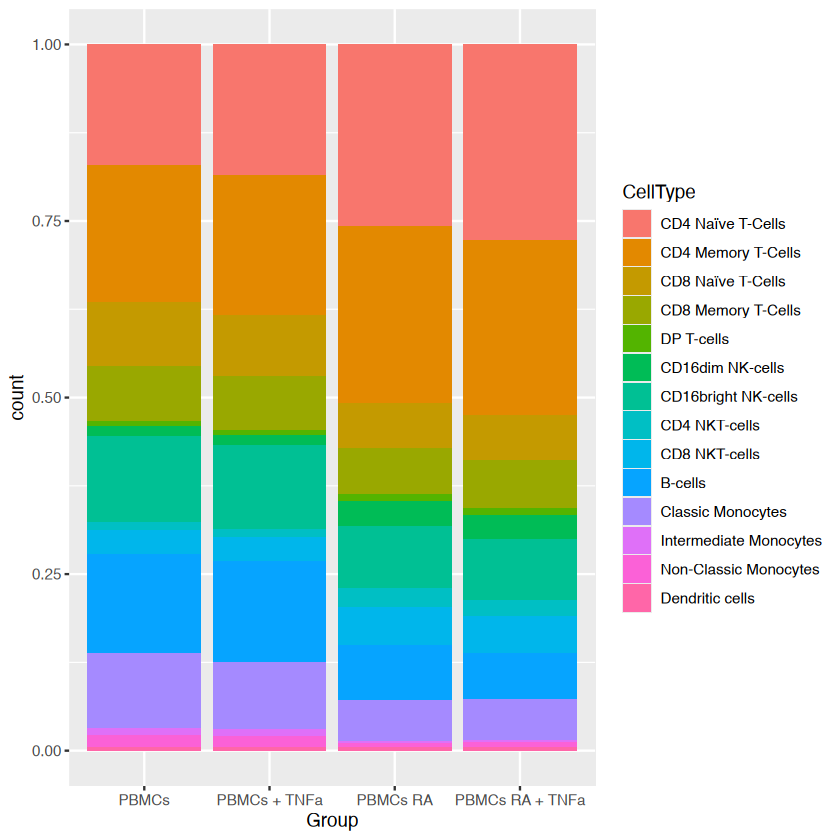

In [5]:
# Cluster per sample
ggplot(harmonized_seurat@meta.data, aes(x=Group, fill=CellType)) + geom_bar(position = "fill")
# Save the last plot as a pdf

ggsave(
  "Cluster per group.pdf",
  plot = last_plot(),
  device = "pdf",
#   path = NULL,
#   scale = 1,
#   1 plot == 10 cm in each dimention
  width = 16,
  height = 40,
  units = "cm",
  dpi = 10000,
  limitsize = TRUE,
#   bg = NULL,
)

# Tip! Open PDF files in Pixelmator Pro and export them as 1x jpg for papers!

In [ ]:
DefaultAssay(harmonized_seurat) <- 'ADT'
features_Ab = c('CD120A-TNFRSF1A-AHS0439-pAbO','CD120b-TNFRSF1B-AHS0421-pAbO')

# harmonized_seurat.subsampled <- harmonized_seurat[, sample(colnames(harmonized_seurat), size =10000, replace=F)]
harmonized_seurat.subsampled <- subset(harmonized_seurat, `CD120A-TNFRSF1A-AHS0439-pAbO` < 1)
harmonized_seurat.subsampled <- subset(harmonized_seurat.subsampled, `CD120b-TNFRSF1B-AHS0421-pAbO` < 4)

In [ ]:
StackedVlnPlot(obj = harmonized_seurat.subsampled, features = features_Ab) 

ggsave(
  "TNFR-Violin.pdf",
  plot = last_plot(),
  device = "pdf",
#   path = NULL,
#   scale = 1,
#   1 plot == 10 cm in each dimention
  width = 30,
  height = 20,
  units = "cm",
  dpi = 10000,
  limitsize = TRUE,
#   bg = NULL,
)

In [6]:
Multimodal_seurat_groups <- harmonized_seurat

Multimodal_seurat_groups <- SetIdent(Multimodal_seurat_groups, value = Multimodal_seurat_groups@meta.data$CellType)
Multimodal_seurat_groups$CellType.Group <- paste(Idents(Multimodal_seurat_groups), 
                                                      Multimodal_seurat_groups$Group, sep="_")
Multimodal_seurat_groups$CellType <- Idents(Multimodal_seurat_groups)
Idents(Multimodal_seurat_groups) <- "CellType.Group"
Multimodal_seurat_groups@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,percent.mt,Sample,Group,nCount_SCT,nFeature_SCT,SCT.weight,ADT.weight,wsnn_res.0.7,seurat_clusters,wsnn_res.0.6,wsnn_res.0.65,CellType,CellType.Group
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
Group_PBMCs_Sample_PBMCs 1_3794,SeuratProject,7528,2730,2481,9,17.747078,PBMCs 1,PBMCs,6709,2696,1.217581e-01,0.87824194,9,9,9,8,CD8 Naïve T-Cells,CD8 Naïve T-Cells_PBMCs
Group_PBMCs_Sample_PBMCs 1_54922,SeuratProject,16229,4227,3939,10,9.951322,PBMCs 1,PBMCs,6193,2367,9.825991e-01,0.01740094,14,14,14,14,Non-Classic Monocytes,Non-Classic Monocytes_PBMCs
Group_PBMCs_Sample_PBMCs 1_68296,SeuratProject,6681,2578,1075,9,19.353390,PBMCs 1,PBMCs,6466,2537,1.565095e-01,0.84349050,2,2,1,2,CD16bright NK-cells,CD16bright NK-cells_PBMCs
Group_PBMCs_Sample_PBMCs 1_97680,SeuratProject,7054,2780,908,10,13.935356,PBMCs 1,PBMCs,6650,2750,5.984395e-01,0.40156051,2,2,1,2,CD16bright NK-cells,CD16bright NK-cells_PBMCs
Group_PBMCs_Sample_PBMCs 1_121103,SeuratProject,7480,2813,863,10,14.879679,PBMCs 1,PBMCs,6731,2779,1.982611e-01,0.80173885,2,2,1,2,CD16bright NK-cells,CD16bright NK-cells_PBMCs
Group_PBMCs_Sample_PBMCs 1_127633,SeuratProject,6461,2554,1002,9,14.099985,PBMCs 1,PBMCs,6356,2513,5.496605e-01,0.45033949,2,2,1,2,CD16bright NK-cells,CD16bright NK-cells_PBMCs
Group_PBMCs_Sample_PBMCs 1_181828,SeuratProject,8725,3059,2633,10,12.664756,PBMCs 1,PBMCs,6841,2995,9.138470e-01,0.08615302,15,15,17,17,CD4 Naïve T-Cells,CD4 Naïve T-Cells_PBMCs
Group_PBMCs_Sample_PBMCs 1_201636,SeuratProject,8005,2880,2969,10,12.592130,PBMCs 1,PBMCs,6796,2844,2.326672e-01,0.76733283,0,0,4,0,CD4 Memory T-Cells,CD4 Memory T-Cells_PBMCs
Group_PBMCs_Sample_PBMCs 1_243955,SeuratProject,6026,2344,422,10,13.624295,PBMCs 1,PBMCs,6042,2316,4.632253e-01,0.53677468,3,3,2,3,B-cells,B-cells_PBMCs


In [ ]:
table(Multimodal_seurat_groups@meta.data$CellType.Group)

In [ ]:
DefaultAssay(Multimodal_seurat_groups) <- 'SCT'
# DefaultAssay(Multimodal_seurat_groups) <- 'ADT'

cluster <- FindMarkers(Multimodal_seurat_groups, ident.1 = "Classic Monocytes_PBMCs + TNFa", 
                               ident.2 = "Classic Monocytes_PBMCs",
                       only.pos = FALSE, 
                       logfc.threshold = 1.,
                       min.pct = 0.25, recorrect_umi=FALSE)
cluster <- cluster[order(cluster$p_val_adj,decreasing=FALSE),]
head(cluster, 50)
# write.csv(cluster, "??? DGE.csv")

In [7]:
saveRDS(harmonized_seurat, file = "Seurat_Clusters_Groups.rds")

# AUCell

In [ ]:
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("AUCell")

In [10]:
harmonized_seurat <- readRDS("Seurat_Clusters_Groups.rds")

In [8]:
library(AUCell)

#### https://onlinetexttools.com/add-quotes-to-words

In [96]:
# TNFRSF1A
TNF <- c('CRIM1','PTGS2', 'TNIP3', 'EHD1', 'ID2', 'NBN', 'PSTPIP2', 'AK4', 'DRAM1', 'MAILR', 
             'GCH1', 'SNX10',  'MAP3K8', 'MTF1',  'MMP14', 'SGPP2', 'ACSL1', 'TNFAIP8', 'TNFAIP6','CCL3', 
             'CCL4',  'IL1A','IL1B','SNX9', 'NIBAN1', 'JUNB', 'JUN','FOS', 'CXCL2', 'CXCL3', 'ATP2B1')

Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



 min   1%   5%  10%  50% 100% 
 822 1535 1769 1942 2618 4118 


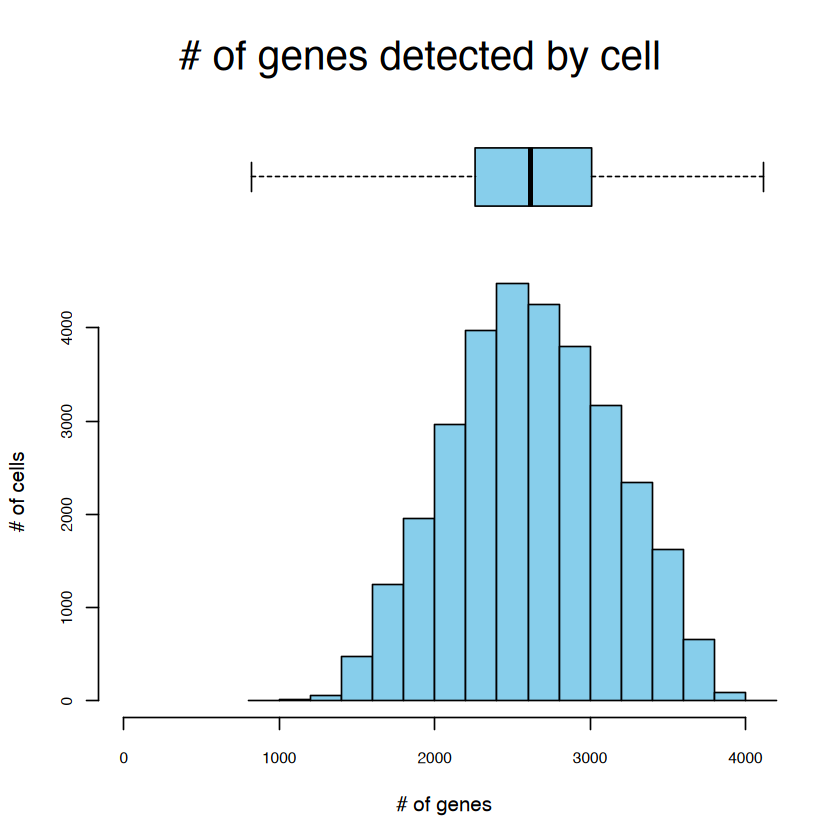

In [40]:
DefaultAssay(Multimodal_seurat_groups) <- 'SCT'
counts <- GetAssayData(object = Multimodal_seurat_groups, slot = "counts")
cell_rankings <- AUCell_buildRankings(counts)

In [97]:
cells_AUC_TNFRSF1A <- AUCell_calcAUC(combined_GEX_KEGG, cell_rankings)
# cells_AUC_TNFRSF1B <- AUCell_calcAUC(ifnb, cell_rankings) # No TNFRSF1B signaling was detected at all

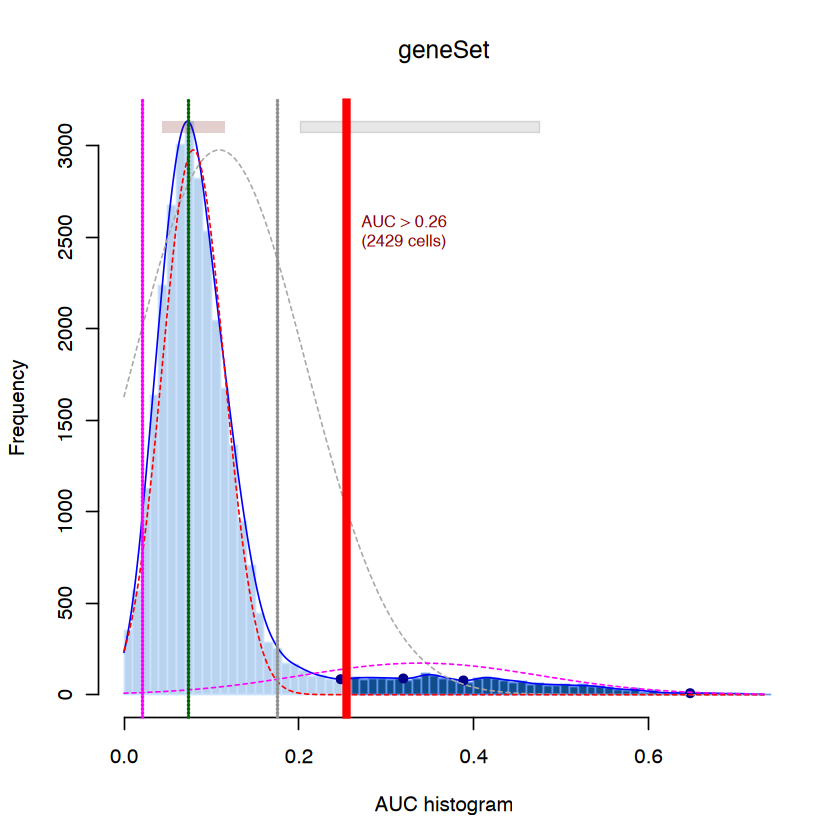

In [98]:
cells_assignment <- AUCell_exploreThresholds(cells_AUC_TNFRSF1A, plotHist = TRUE, assign=TRUE)

In [99]:
Multimodal_seurat_groups <- SetIdent(Multimodal_seurat_groups, value = Multimodal_seurat_groups@meta.data$CellType.Group)

PEX <- GetAssayData(Multimodal_seurat_groups[["ADT"]], layer = "data")
write.csv(t(PEX), "Protein Expression.csv")

AUC_tnfa <- getAUC(cells_AUC_TNFRSF1A)
write.csv(t(AUC_tnfa), "Cellular Response to TNFa AUC.csv")

meta <- Multimodal_seurat_groups@meta.data
write.csv(meta, "Meta Data.csv")

In [100]:
Ab_mol <- GetAssayData(Multimodal_seurat_groups[["ADT"]], layer = "counts")
write.csv(Ab_mol, "AbSeq Molecule Counts.csv")

# Pseudobulk Export

Quantiles for the number of genes detected by cell: 
(Non-detected genes are shuffled at the end of the ranking. Keep it in mind when choosing the threshold for calculating the AUC).



 min   1%   5%  10%  50% 100% 
 822 1535 1769 1942 2618 4118 


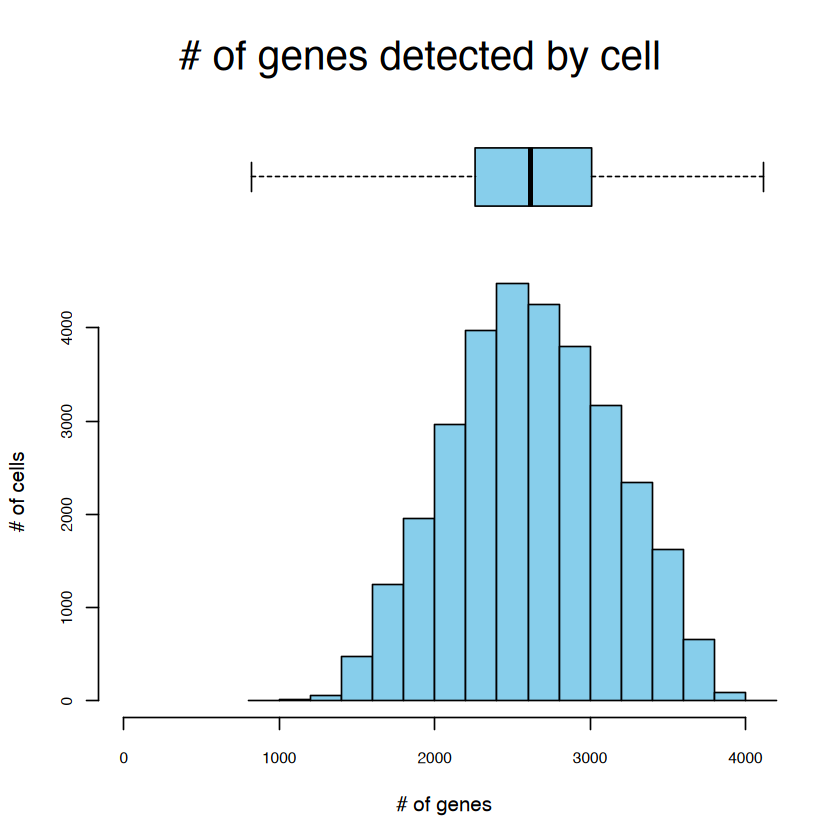

In [101]:
DefaultAssay(harmonized_seurat) <- 'SCT'
counts <- GetAssayData(object = harmonized_seurat, slot = "counts")
cell_rankings <- AUCell_buildRankings(counts)

,Group_PBMCs_Sample_PBMCs 1_3794,Group_PBMCs_Sample_PBMCs 1_54922,Group_PBMCs_Sample_PBMCs 1_68296,Group_PBMCs_Sample_PBMCs 1_97680,Group_PBMCs_Sample_PBMCs 1_121103,Group_PBMCs_Sample_PBMCs 1_127633,Group_PBMCs_Sample_PBMCs 1_181828,Group_PBMCs_Sample_PBMCs 1_201636,Group_PBMCs_Sample_PBMCs 1_243955,Group_PBMCs_Sample_PBMCs 1_282692,⋯,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56294020,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56334421,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56357701,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56381585,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56393507,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56454804,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56468994,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56521104,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56530152,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56604930
geneSet,0.07599345,0.2093735,0.01958859,0.1035531,0.0672978,0.06472651,0.04172511,0.13518,0.06203834,0.0659654,⋯,0.1210612,0.1141655,0.07730248,0.1041842,0.08036466,0.01245909,0.04836372,0.04289388,0.06954184,0.05724638


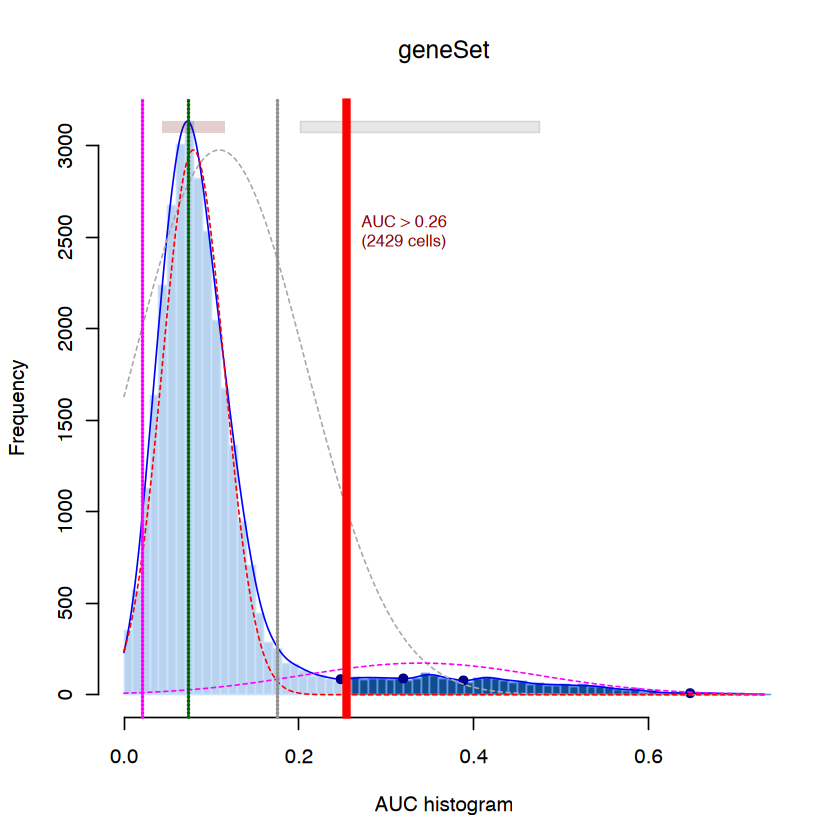

In [102]:
cells_AUC_TNFRSF1A <- AUCell_calcAUC(combined_GEX_KEGG, cell_rankings)
cells_assignment <- AUCell_exploreThresholds(cells_AUC_TNFRSF1A, plotHist = TRUE, assign=TRUE)
AUC_tnfa <- getAUC(cells_AUC_TNFRSF1A)
head(AUC_tnfa)

In [107]:
rownames(AUC_tnfa) <- 'TNFa'
head(AUC_tnfa)

,Group_PBMCs_Sample_PBMCs 1_3794,Group_PBMCs_Sample_PBMCs 1_54922,Group_PBMCs_Sample_PBMCs 1_68296,Group_PBMCs_Sample_PBMCs 1_97680,Group_PBMCs_Sample_PBMCs 1_121103,Group_PBMCs_Sample_PBMCs 1_127633,Group_PBMCs_Sample_PBMCs 1_181828,Group_PBMCs_Sample_PBMCs 1_201636,Group_PBMCs_Sample_PBMCs 1_243955,Group_PBMCs_Sample_PBMCs 1_282692,⋯,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56294020,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56334421,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56357701,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56381585,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56393507,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56454804,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56468994,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56521104,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56530152,Group_PBMCs RA + TNFa_Sample_PBMCs RA + TNFa 3_56604930
TNFa,0.07599345,0.2093735,0.01958859,0.1035531,0.0672978,0.06472651,0.04172511,0.13518,0.06203834,0.0659654,⋯,0.1210612,0.1141655,0.07730248,0.1041842,0.08036466,0.01245909,0.04836372,0.04289388,0.06954184,0.05724638


In [108]:
harmonized_seurat[['AUC']] <- CreateAssayObject(data = AUC_tnfa)
harmonized_seurat

Warning message:
“Layer counts isn't present in the assay object; returning NULL”


An object of class Seurat 
65013 features across 31101 samples within 4 assays 
Active assay: SCT (27915 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 3 other assays present: RNA, ADT, AUC
 5 dimensional reductions calculated: apca, pca, mRNA_harmony, abseq_harmony, wnn.umap

In [11]:
# Subset Classic Monocytes for pseudobulk DGE
classic_mono <- subset(harmonized_seurat, idents = "Classic Monocytes")
classic_mono

An object of class Seurat 
65012 features across 2579 samples within 3 assays 
Active assay: ADT (10 features, 10 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, SCT
 5 dimensional reductions calculated: apca, pca, mRNA_harmony, abseq_harmony, wnn.umap

In [12]:
classic_mono_samples <- classic_mono

classic_mono_samples <- SetIdent(classic_mono_samples, value = classic_mono_samples@meta.data$CellType)
classic_mono_samples$CellType.Sample <- paste(Idents(classic_mono_samples), 
                                                      classic_mono_samples$Sample, sep="_")
classic_mono_samples$CellType <- Idents(classic_mono_samples)
Idents(classic_mono_samples) <- "CellType.Sample"
classic_mono_samples@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,percent.mt,Sample,Group,nCount_SCT,nFeature_SCT,SCT.weight,ADT.weight,wsnn_res.0.7,seurat_clusters,wsnn_res.0.6,wsnn_res.0.65,CellType,CellType.Sample
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
Group_PBMCs_Sample_PBMCs 1_294188,SeuratProject,19459,4582,658,10,10.123850,PBMCs 1,PBMCs,6403,2332,0.1140389461,0.8859611,5,5,5,4,Classic Monocytes,Classic Monocytes_PBMCs 1
Group_PBMCs_Sample_PBMCs 1_1198653,SeuratProject,20567,4575,1729,10,10.910682,PBMCs 1,PBMCs,6398,2278,0.4835225121,0.5164775,5,5,5,4,Classic Monocytes,Classic Monocytes_PBMCs 1
Group_PBMCs_Sample_PBMCs 1_2034439,SeuratProject,21436,4666,345,10,8.145176,PBMCs 1,PBMCs,6462,2289,0.2851167507,0.7148832,5,5,5,4,Classic Monocytes,Classic Monocytes_PBMCs 1
Group_PBMCs_Sample_PBMCs 1_3366978,SeuratProject,21409,5020,467,10,13.611098,PBMCs 1,PBMCs,6326,2544,0.3532251583,0.6467748,5,5,5,4,Classic Monocytes,Classic Monocytes_PBMCs 1
Group_PBMCs_Sample_PBMCs 1_3654198,SeuratProject,2927,1289,979,10,21.113768,PBMCs 1,PBMCs,5617,1335,0.0004519367,0.9995481,5,5,5,4,Classic Monocytes,Classic Monocytes_PBMCs 1
Group_PBMCs_Sample_PBMCs 1_3754823,SeuratProject,12510,3536,753,10,11.207034,PBMCs 1,PBMCs,6955,2939,0.3091063309,0.6908937,5,5,5,4,Classic Monocytes,Classic Monocytes_PBMCs 1
Group_PBMCs_Sample_PBMCs 1_5085388,SeuratProject,6611,2519,193,10,11.072455,PBMCs 1,PBMCs,6458,2488,0.2382220844,0.7617779,5,5,5,4,Classic Monocytes,Classic Monocytes_PBMCs 1
Group_PBMCs_Sample_PBMCs 1_5398961,SeuratProject,17593,4365,911,10,8.139601,PBMCs 1,PBMCs,6261,2236,0.2777900471,0.7222100,5,5,5,4,Classic Monocytes,Classic Monocytes_PBMCs 1
Group_PBMCs_Sample_PBMCs 1_7058553,SeuratProject,16493,3892,485,10,11.180501,PBMCs 1,PBMCs,6218,2022,0.3351538781,0.6648461,5,5,5,4,Classic Monocytes,Classic Monocytes_PBMCs 1


In [25]:
# Ensure the active assay is RNA
DefaultAssay(classic_mono_samples) <- "RNA"

# Set the active assay to RNA
DefaultAssay(classic_mono_samples) <- "RNA"

# Extract raw counts (UMI counts)
umi_counts <- GetAssayData(classic_mono_samples, slot = "counts")

# Extract cluster identities
cluster_ids <- as.character(Idents(classic_mono_samples))

# Ensure the cluster identities are a factor and align with column names of the counts matrix
cluster_ids <- factor(cluster_ids, levels = unique(cluster_ids))

# Use Matrix package for better handling of sparse matrices
library(Matrix)

# Aggregate the UMI counts by cluster
pseudobulk_counts <- as.data.frame(as.matrix(umi_counts) %*% model.matrix(~0 + cluster_ids))

# Rename columns to reflect cluster names
colnames(pseudobulk_counts) <- levels(cluster_ids)

# Save the pseudobulk counts as a CSV file
write.csv(pseudobulk_counts, "classic_mono_umi_counts.csv", row.names = TRUE)

Warning message:
“The following requested variables were not found: auc_TNFa”
Warning message:
“Only one identity present, the expression values will be not scaled”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


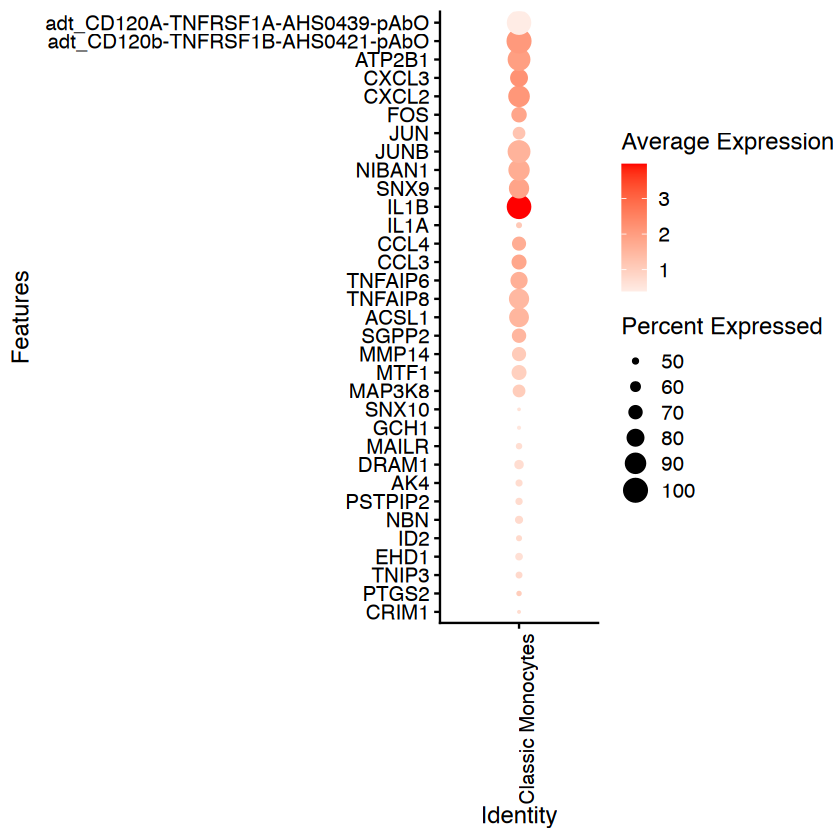

In [8]:
library(viridis)
TNF = c('CRIM1','PTGS2', 'TNIP3', 'EHD1', 'ID2', 'NBN', 'PSTPIP2', 'AK4', 'DRAM1', 'MAILR', 
             'GCH1', 'SNX10',  'MAP3K8', 'MTF1',  'MMP14', 'SGPP2', 'ACSL1', 'TNFAIP8', 'TNFAIP6','CCL3', 
             'CCL4',  'IL1A','IL1B','SNX9', 'NIBAN1', 'JUNB', 'JUN','FOS', 'CXCL2', 'CXCL3', 'ATP2B1',
             'auc_TNFa',
             'adt_CD120b-TNFRSF1B-AHS0421-pAbO','adt_CD120A-TNFRSF1A-AHS0439-pAbO')

library(viridis)
DefaultAssay(classic_mono_samples) <- 'SCT'
DotPlot(classic_mono_samples, 
        features = TNF) + RotatedAxis() + coord_flip() + scale_colour_gradient2(low = "blue", mid = "white", high = "red") + theme(axis.text.x = element_text(angle = 90))
# + scale_colour_viridis() 
# Save the last plot as a pdf

ggsave(
  "Dot plot.pdf",
  plot = last_plot(),
  device = "pdf",
#   path = NULL,
#   scale = 1,
#   1 plot == 10 cm in each dimention
  width = 21.5,
  height = 40,
  units = "cm",
  dpi = 10000,
  limitsize = TRUE,
#   bg = NULL,
)

# Tip! Open PDF files in Pixelmator Pro and export them as 1x jpg for papers!

In [63]:
# Set the active assay to RNA
DefaultAssay(classic_mono_samples) <- "SCT"

# Extract raw counts (UMI counts)
counts <- GetAssayData(classic_mono_samples, slot = "data")

# Extract cluster identities
cluster_ids <- as.character(Idents(classic_mono_samples))

# Ensure the cluster identities are a factor and align with column names of the counts matrix
cluster_ids <- factor(cluster_ids, levels = unique(cluster_ids))

# Use Matrix package for better handling of sparse matrices
library(Matrix)

# Aggregate the UMI counts by cluster
pseudobulk_counts <- as.data.frame(as.matrix(counts) %*% model.matrix(~0 + cluster_ids))

# Rename columns to reflect cluster names
colnames(pseudobulk_counts) <- levels(cluster_ids)

# Save the pseudobulk counts as a CSV file
write.csv(pseudobulk_counts, "classic_mono_SCT_counts.csv", row.names = TRUE)

In [116]:
# Set the default assay
DefaultAssay(classic_mono_samples) <- "ADT"
# Calculate the average expression per cluster
avg_expression <- AverageExpression(classic_mono_samples, return.seurat = FALSE)

# Convert the resulting list to a data frame (if necessary)
avg_expression_df <- as.data.frame(avg_expression$ADT)
# Export the data to a CSV file
write.csv(t(avg_expression_df), "classic_mono_PEX.csv")

# Set the default assay
DefaultAssay(classic_mono_samples) <- "AUC"
# Calculate the average expression per cluster
avg_expression <- AverageExpression(classic_mono_samples, return.seurat = FALSE)

# Convert the resulting list to a data frame (if necessary)
avg_expression_df <- as.data.frame(avg_expression$AUC)
# Export the data to a CSV file
write.csv(t(avg_expression_df), "classic_mono_AUC.csv")

Warning message:
“No layers found matching search pattern provided”
Warning message:
“No layers found matching search pattern provided”


In [13]:
# Subset Classic Monocytes for pseudobulk DGE
Idents(classic_mono_samples) <- "CellType.Sample"

classic_mono_DGE <- subset(classic_mono_samples, idents = c("Classic Monocytes_PBMCs 1",
                          "Classic Monocytes_PBMCs 2","Classic Monocytes_PBMCs 3",
                          "Classic Monocytes_PBMCs RA 1",
                          "Classic Monocytes_PBMCs RA 2","Classic Monocytes_PBMCs RA 3"))
classic_mono_DGE

An object of class Seurat 
65012 features across 1367 samples within 3 assays 
Active assay: ADT (10 features, 10 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, SCT
 5 dimensional reductions calculated: apca, pca, mRNA_harmony, abseq_harmony, wnn.umap

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


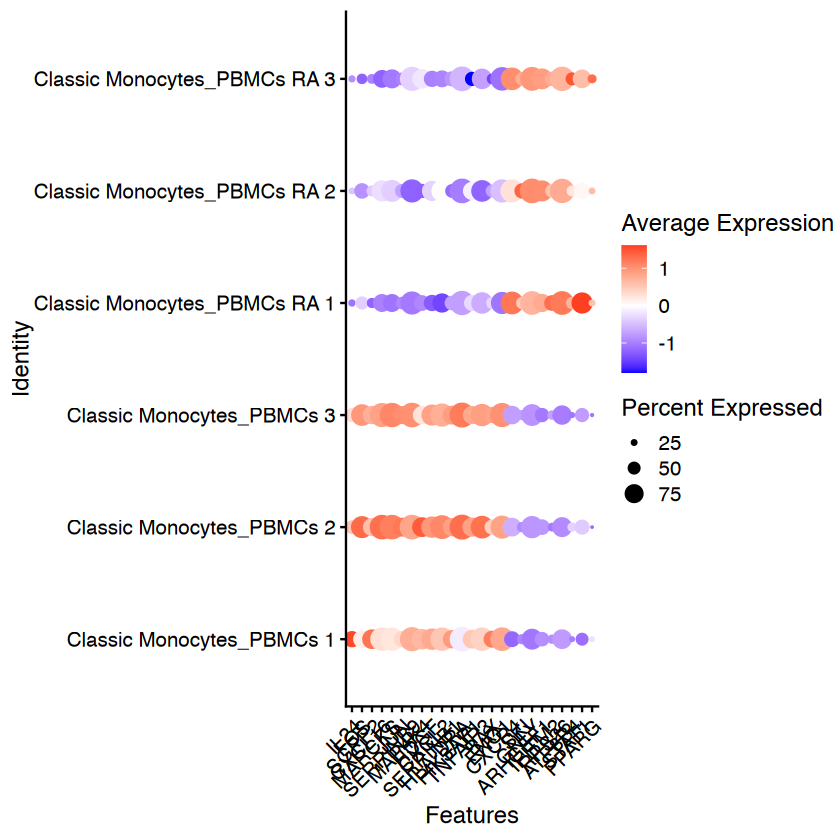

In [30]:
DGE = c('IL24', 'FOS', 'SGPP2', 'CXCL16', 'MARCKS', 'JUN', 'SERPINB9', 'MAP4K4', 'HDGF', 'CXCL2','SERPINB1', 'HLA-DRA', 
        'PIK3AP1', 'TNFAIP2',
        'BAX', 'ENO1',  'CXCR4', 'SKI', 'GNLY', 'ARHGEF1', 'IFITM2',
        'RPS26', 'ATP8B4','STAT1','PPARG')

library(viridis)
DefaultAssay(classic_mono_DGE) <- 'SCT'
DotPlot(classic_mono_DGE, 
        features = DGE) + RotatedAxis() + scale_colour_gradient2(low = "blue", mid = "white", high = "red") 
# + scale_colour_viridis() + coord_flip() + theme(axis.text.x = element_text(angle = 90))
# Save the last plot as a pdf
 
ggsave(
  "Dot plot DGE.pdf",
  plot = last_plot(),
  device = "pdf",
#   path = NULL,
#   scale = 1,
#   1 plot == 10 cm in each dimention
  width = 40,
  height = 12,
  units = "cm",
  dpi = 10000,
  limitsize = TRUE,
#   bg = NULL,
)

# Tip! Open PDF files in Pixelmator Pro and export them as 1x jpg for papers!